In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",None)

In [2]:
#Import train and test data

In [3]:
train = pd.read_csv("Property_Price_Train.csv")
test = pd.read_csv("Property_Price_Test.csv")

In [4]:
#Dropping column ID from train and test data

In [5]:
train.drop(["Id"], axis = 1, inplace = True)
test.drop(["Id"], axis = 1, inplace = True)

In [6]:
test.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.shape

(1459, 80)

In [8]:
test.shape

(1459, 79)

In [9]:
alldata = train.append(test)

In [10]:
alldata.shape

(2918, 80)

In [11]:
alldata

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450.000000,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2.0,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RLD,80.0,9600.000000,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2.0,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RLD,68.0,11250.000000,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2.0,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RLD,60.0,9550.000000,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3.0,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RLD,84.0,14260.000000,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3.0,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RMD,21.0,14584.838440,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,7,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,TF,0,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,Y,0.000000,0.000000,0.000000,0,0,0,NaN,NaN,NaN,0,6,2006,WD,NoRMDal,NaN
1455,160,RMD,21.0,8072.991379,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,TwnhsE,2Story,4,5,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,TF,0,NaN,CarPort,1970.0,Unf

In [12]:
alldata.reset_index(inplace = True)

In [13]:
alldata

,index,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,0,60,RLD,65.0,8450.000000,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2.0,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,20,RLD,80.0,9600.000000,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2.0,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,60,RLD,68.0,11250.000000,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2.0,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,70,RLD,60.0,9550.000000,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3.0,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,60,RLD,84.0,14260.000000,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3.0,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,1454,160,RMD,21.0,14584.838440,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,7,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,TF,0,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,Y,0.000000,0.000000,0.000000,0,0,0,NaN,NaN,NaN,0,6,2006,WD,NoRMDal,NaN
2914,1455,160,RMD,21.0,8072.991379,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,TwnhsE,2Story,4,5,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA

In [14]:
alldata.describe()

,index,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,2918.00000,2918.000000,2432.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2895.000000,2917.000000,2917.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2916.000000,2916.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2759.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,1459.000000
mean,729.00000,57.150446,69.303454,10194.634957,6.089445,5.564428,1971.314942,1984.271076,102.236615,441.290024,49.499829,560.917724,1051.707576,1159.548663,336.599040,4.696025,1500.843729,0.429698,0.061385,1.568197,0.380055,2.860178,1.044551,6.451679,0.597327,1978.118159,1.766884,471.851510,93.095222,48.062908,24.411772,2.603153,16.067855,2.252570,50.843386,6.213160,2007.792666,180944.102810
std,421.24911,42.519354,23.349420,7888.702911,1.410045,1.113292,30.296408,20.894880,179.355169,455.632103,169.176028,439.548616,440.825601,392.425265,428.729653,46.404695,506.117484,0.524719,0.245726,0.552964,0.502827,0.822830,0.214497,1.569626,0.646145,25.577701,0.761623,213.846684,126.257764,68.167925,64.346881,25.192440,56.193208,35.670034,567.498680,2.715224,1.315184,79464.918335
min,0.00000,20.000000,21.000000,-4265.104479,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,-129.369350,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.25000,20.000000,59.000000,7134.500000,5.000000,5.000000,1953.250000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129950.000000
50%,729.00000,50.000000,68.000000,9600.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,477.000000,75.123594,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1093.75000,70.000000,80.000000,12342.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,806.000000,1302.000000,1387.750000,704.000000,0.000000,1743.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,593.481992,173.183207,86.733331,50.325034,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1458.00000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
# seggregating numeric and non-numeric columns
numeric_columns = alldata.select_dtypes(include = [np.number])
categorical_columns = alldata.select_dtypes(exclude = [np.number])

In [16]:
missing_num = numeric_columns.isnull().sum()
missing_num = missing_num[missing_num>0]

In [17]:
missing_cat = categorical_columns.isnull().sum()
missing_cat = missing_cat[missing_cat>0]

In [18]:
missing_num

Lot_Extent                    486
Brick_Veneer_Area              23
BsmtFinSF1                      1
BsmtFinSF2                      1
BsmtUnfSF                       1
Total_Basement_Area             1
Underground_Full_Bathroom       2
Underground_Half_Bathroom       2
Garage_Built_Year             159
Garage_Size                     1
Garage_Area                     1
Sale_Price                   1459
dtype: int64

In [19]:
missing_cat

Zoning_Class                4
Lane_Type                2720
Utility_Type                2
Exterior1st                 1
Exterior2nd                 1
Brick_Veneer_Type          24
Basement_Height            81
Basement_Condition         82
Exposure_Level             82
BsmtFinType1               79
BsmtFinType2               80
Electrical_System           1
Kitchen_Quality             1
Functional_Rate             2
Fireplace_Quality        1419
Garage                    157
Garage_Finish_Year        159
Garage_Quality            159
Garage_Condition          159
Pool_Quality             2908
Fence_Quality            2347
Miscellaneous_Feature    2813
Sale_Type                   1
dtype: int64

In [20]:
numeric_columns.fillna(numeric_columns.median(),inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
numeric_columns.isna().sum()

index                        0
Building_Class               0
Lot_Extent                   0
Lot_Size                     0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Brick_Veneer_Area            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtUnfSF                    0
Total_Basement_Area          0
First_Floor_Area             0
Second_Floor_Area            0
LowQualFinSF                 0
Grade_Living_Area            0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Full_Bathroom_Above_Grade    0
Half_Bathroom_Above_Grade    0
Bedroom_Above_Grade          0
Kitchen_Above_Grade          0
Rooms_Above_Grade            0
Fireplaces                   0
Garage_Built_Year            0
Garage_Size                  0
Garage_Area                  0
W_Deck_Area                  0
Open_Lobby_Area              0
Enclosed_Lobby_Area          0
Three_Season_Lobby_Area      0
Screen_L

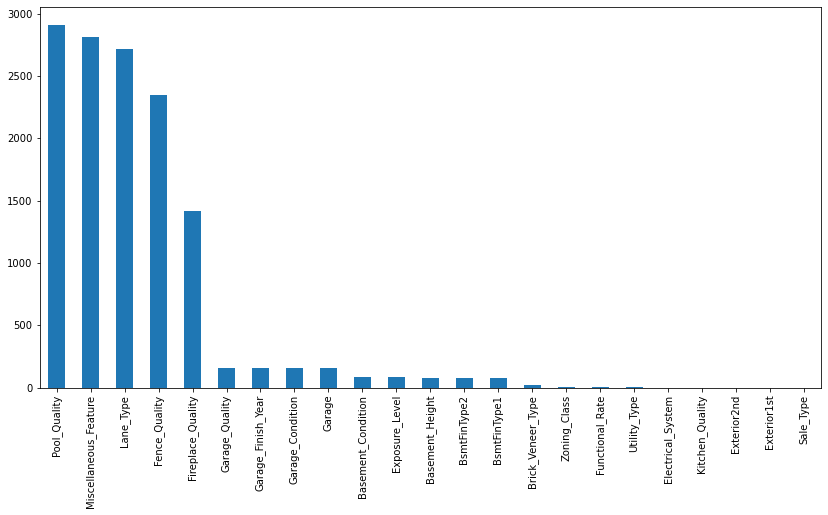

In [22]:
missing_cat.sort_values(ascending=False).plot(kind="bar", figsize=(14,7));

In [23]:
categorical_columns.fillna("None",inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
categorical_columns.isnull().sum()

Zoning_Class             0
Road_Type                0
Lane_Type                0
Property_Shape           0
Land_Outline             0
Utility_Type             0
Lot_Configuration        0
Property_Slope           0
Neighborhood             0
Condition1               0
Condition2               0
House_Type               0
House_Design             0
Roof_Design              0
Roof_Quality             0
Exterior1st              0
Exterior2nd              0
Brick_Veneer_Type        0
Exterior_Material        0
Exterior_Condition       0
Foundation_Type          0
Basement_Height          0
Basement_Condition       0
Exposure_Level           0
BsmtFinType1             0
BsmtFinType2             0
Heating_Type             0
Heating_Quality          0
Air_Conditioning         0
Electrical_System        0
Kitchen_Quality          0
Functional_Rate          0
Fireplace_Quality        0
Garage                   0
Garage_Finish_Year       0
Garage_Quality           0
Garage_Condition         0
P

In [25]:
numeric_columns.iloc[:,35:37]

,Month_Sold,Year_Sold
0,2,2008
1,5,2007
2,9,2008
3,2,2006
4,12,2008
...,...,...
2913,6,2006
2914,4,2006
2915,9,2006
2916,7,2006


In [26]:
#min max tranformation on numeric columns

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [28]:
# scaling down the numeric values

In [29]:
#For referring specific columns
columns = numeric_columns.iloc[:,1:37].columns
df_mm_num = pd.DataFrame(min_max.fit_transform(numeric_columns.iloc[:,1:37]),columns = columns)

#For all columns
#columns = numeric_columns.columns
#df_mm_num = pd.DataFrame(min_max.fit_transform(numeric_columns))

In [30]:
df_mm_num.shape

(2918, 36)

In [31]:
#copying "index" column from  df_mm_num dataframe and pasting to dataframe after min-max tranformation
df_mm_num = pd.concat([df_mm_num,numeric_columns["index"]],axis=1)
pop = df_mm_num.pop("index")
df_mm_num.insert(0,"index",pop)

#dropping "index" column as it is not required
df_mm_num.pop("index")

0          0
1          1
2          2
3          3
4          4
        ... 
2913    1454
2914    1455
2915    1456
2916    1457
2917    1458
Name: index, Length: 2918, dtype: int64

In [32]:
df_mm_num.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
0,0.235294,0.150685,0.057925,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.751321,0.284829,0.276324,0.157328,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.063164,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.201368,0.304755,0.281834,0.152826,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.070681,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.214817,0.206706,0.235952,0.100760,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.062936,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.510932,0.218522,0.244666,0.191815,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.084393,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.431707,0.185849,0.223759,0.158561,0.0,0.0,0.0,0.0,1.000000,0.50


In [33]:
# Performing one hot coding

In [34]:
#before one hot coding
categorical_columns.shape

(2918, 43)

In [35]:
dummy = pd.get_dummies(categorical_columns)
categorical_columns = dummy
print("Dummy columns:{}".format(dummy.shape))
print("categorical columns:{}".format(categorical_columns.shape))

Dummy columns:(2918, 283)
categorical columns:(2918, 283)


In [36]:
categorical_columns.columns

Index(['Zoning_Class_Commer', 'Zoning_Class_FVR', 'Zoning_Class_None',
       'Zoning_Class_RHD', 'Zoning_Class_RLD', 'Zoning_Class_RMD',
       'Road_Type_Gravel', 'Road_Type_Paved', 'Lane_Type_Grvl',
       'Lane_Type_None',
       ...
       'Sale_Type_Oth', 'Sale_Type_WD', 'Sale_Condition_AbnoRMDl',
       'Sale_Condition_Abnorml', 'Sale_Condition_AdjLand',
       'Sale_Condition_Alloca', 'Sale_Condition_Family',
       'Sale_Condition_NoRMDal', 'Sale_Condition_Normal',
       'Sale_Condition_Partial'],
      dtype='object', length=283)

In [37]:
df_mm_num.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold
0,0.235294,0.150685,0.057925,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.751321,0.284829,0.276324,0.157328,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.063164,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.201368,0.304755,0.281834,0.152826,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.070681,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.214817,0.206706,0.235952,0.100760,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.062936,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.510932,0.218522,0.244666,0.191815,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.084393,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.431707,0.185849,0.223759,0.158561,0.0,0.0,0.0,0.0,1.000000,0.50


In [38]:
df_mm_num = pd.concat([df_mm_num,alldata["Sale_Price"]],axis=1)

In [39]:
df_mm_num.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,0.235294,0.150685,0.057925,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.4,0.751321,0.284829,0.276324,0.157328,0.0,0.0,0.0,0.0,0.090909,0.50,208500.0
1,0.000000,0.202055,0.063164,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.4,0.201368,0.304755,0.281834,0.152826,0.0,0.0,0.0,0.0,0.363636,0.25,181500.0
2,0.235294,0.160959,0.070681,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.4,0.214817,0.206706,0.235952,0.100760,0.0,0.0,0.0,0.0,0.727273,0.50,223500.0
3,0.294118,0.133562,0.062936,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.6,0.510932,0.218522,0.244666,0.191815,0.0,0.0,0.0,0.0,0.090909,0.00,140000.0
4,0.235294,0.215753,0.084393,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.6,0.431707,0.185849,0.223759,0.158561,0.0,0.0,0.0,0.0,1.000000,0.50,250000.0


In [40]:
alldata_1 = pd.concat([df_mm_num,categorical_columns], axis = 1)

In [41]:
alldata_1.shape

(2918, 320)

In [42]:
alldata_1.head(3)

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_None,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Lane_Type_Grvl,Lane_Type_None,Lane_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Utility_Type_AllPub,Utility_Type_NoSeWa,Utility_Type_None,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Roof_Quality_CT,Roof_Quality_M,Roof_Quality_ME,Roof_Quality_R,Roof_Quality_SS,Roof_Quality_TG,Roof_Quality_WS,Roof_Quality_WSh,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CB,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_None,Basement_Height_TA,Basement_Condition_Fa,Basement_Condition_Gd,Basement_Condition_None,Basement_Condition_Po,Basement_Condition_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,Exposure_Level_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,B

In [43]:
df_train = alldata_1.iloc[0:1459,:]

In [44]:
df_train.tail()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_None,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Lane_Type_Grvl,Lane_Type_None,Lane_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Utility_Type_AllPub,Utility_Type_NoSeWa,Utility_Type_None,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Roof_Quality_CT,Roof_Quality_M,Roof_Quality_ME,Roof_Quality_R,Roof_Quality_SS,Roof_Quality_TG,Roof_Quality_WS,Roof_Quality_WSh,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CB,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_None,Basement_Height_TA,Basement_Condition_Fa,Basement_Condition_Gd,Basement_Condition_None,Basement_Condition_Po,Basement_Condition_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,Exposure_Level_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,B

In [45]:
df_train["Sale_Price"].tail()

1454    185000.0
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
Name: Sale_Price, dtype: float64

In [46]:
df_test = alldata_1.iloc[1459:,:]

In [47]:
df_test.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_None,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Lane_Type_Grvl,Lane_Type_None,Lane_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Utility_Type_AllPub,Utility_Type_NoSeWa,Utility_Type_None,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Roof_Quality_CT,Roof_Quality_M,Roof_Quality_ME,Roof_Quality_R,Roof_Quality_SS,Roof_Quality_TG,Roof_Quality_WS,Roof_Quality_WSh,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CB,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_None,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_None,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_None,Basement_Height_TA,Basement_Condition_Fa,Basement_Condition_Gd,Basement_Condition_None,Basement_Condition_Po,Basement_Condition_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,Exposure_Level_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,B

In [48]:
df_train.shape

(1459, 320)

In [49]:
df_test.shape

(1459, 320)

In [50]:
df_test["Sale_Price"].head()

1459   NaN
1460   NaN
1461   NaN
1462   NaN
1463   NaN
Name: Sale_Price, dtype: float64

In [51]:
df_test = df_test.drop(["Sale_Price"],axis=1)

In [52]:
# creating training and testing dataset using train_test_split 
# Creating train and test split using the df_train data for model building

In [53]:
X = df_train.drop(["Sale_Price"],axis=1)
Y = df_train["Sale_Price"]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1021, 319) (438, 319) (1021,) (438,)


In [56]:
#Importing Stocastic Gradient Descent module for Linear model building
from sklearn.linear_model import SGDRegressor
lr = SGDRegressor()

In [57]:
lr.fit(x_train,y_train)
predict_X_train = lr.predict(x_train)
predict_X_test = lr.predict(x_test)

In [58]:
from sklearn.metrics import r2_score

In [59]:
#Calculating R2 and Adj.R2 for train data

r_square_train = r2_score(y_train,predict_X_train)
adj_r_square_train = 1-((1-r_square_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))

In [60]:
def adj_R2(R_2,x,y):
    """
    Defining function for Adjusted R-squared calculation

    Adjusted R2 = 1-((r2-1)*(n-1) / (n-k-1))

    n = sample size
    k = no. of columns in x

    """
    adj_r2 = 1-((1-R_2)*(len(y)-1)/(len(y)-x.shape[1]-1))
    adj_r2 = round(adj_r2,3)
    return adj_r2

In [61]:
help(adj_R2)

Help on function adj_R2 in module __main__:

adj_R2(R_2, x, y)
    Defining function for Adjusted R-squared calculation
    
    Adjusted R2 = 1-((r2-1)*(n-1) / (n-k-1))
    
    n = sample size
    k = no. of columns in x



In [62]:
#Calculating R2 and Adj.R2 for test data
r_square_test = r2_score(y_test,predict_X_test)
adj_r_square_test = adj_R2(r_square_test,x_test,y_test)

In [63]:
print("Train: R-Squared:{}".format(round(r_square_train,3)))
print("Train: Adj R-Squared:{}".format(round(adj_r_square_train,3)))
print("Test: R-Squared:{}".format(round(r_square_test,3)))
print("Test: Adj R-Squared:{}".format(round(adj_r_square_test,3)))

Train: R-Squared:0.884
Train: Adj R-Squared:0.831
Test: R-Squared:0.867
Test: Adj R-Squared:0.509


In [64]:
# Calculating RMSE - Root Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predict_X_test)
mse = np.sqrt(mse)
mse

30548.250854371214

In [65]:
#creating a model with grid search

In [66]:
help(SGDRegressor)

Help on class SGDRegressor in module sklearn.linear_model._stochastic_gradient:

class SGDRegressor(BaseSGDRegressor)
 |  SGDRegressor(loss='squared_loss', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
 |  
 |  Linear model fitted by minimizing a regularized empirical loss with SGD
 |  
 |  SGD stands for Stochastic Gradient Descent: the gradient of the loss is
 |  estimated each sample at a time and the model is updated along the way with
 |  a decreasing strength schedule (aka learning rate).
 |  
 |  The regularizer is a penalty added to the loss function that shrinks model
 |  parameters towards the zero vector using either the squared euclidean norm
 |  L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
 | 

In [67]:
%%time
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

Grid = {
    "loss" : ['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    "penalty" : ['l2', 'l1', 'elasticnet'],
    "alpha" : [.1,.01,.001,.0001,.00001],
    "learning_rate" : ['constant', 'optimal', 'invscaling', 'adaptive']   
}
clf = GridSearchCV(lr,Grid)
clf.fit(x_train,y_train)

Wall time: 22min 55s


GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [68]:
print("Best Score:{}".format(clf.best_score_))

Best Score:0.8298050297707175


In [69]:
clf.best_params_

{'alpha': 0.001,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'penalty': 'l1'}

In [70]:
lr_best_pm = SGDRegressor(alpha=0.01,learning_rate='adaptive',loss='squared_epsilon_insensitive',penalty='l2')

In [71]:
lr_best_pm.fit(x_train,y_train)

SGDRegressor(alpha=0.01, learning_rate='adaptive',
             loss='squared_epsilon_insensitive')

In [72]:
b_train_predict = lr_best_pm.predict(x_train)
bpm_train_r2 = r2_score(y_train,b_train_predict)
bpm_train_adj_r2 = adj_R2(bpm_train_r2,x_train,y_train)

In [73]:
b_test_predict = lr_best_pm.predict(x_test)
bpm_test_r2 = r2_score(y_test,b_test_predict)
bpm_test_adj_r2 = adj_R2(bpm_test_r2,x_test,y_test)

In [74]:
columns = ("R2","Adj_R2") 
r2 = (bpm_train_r2,bpm_test_r2)
adj_r2 = (bpm_train_adj_r2,bpm_test_adj_r2)

In [75]:
results = pd.DataFrame([r2,adj_r2],columns = columns, index = ["Train","Test"])

In [76]:
results

,R2,Adj_R2
Train,0.896007,0.868654
Test,0.849000,0.514000


In [77]:
df_test_predict = lr_best_pm.predict(df_test)

In [78]:
df_test_predict

array([ 98849.74477665, 145507.85856902, 176665.58045442, ...,
       154857.88370627, 100629.60608393, 219822.61870863])